## In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.  
Following the code to get data into the environment:  


In [38]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets 
boston = datasets.load_boston()  
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)  
targets = boston.target

In [39]:
dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [40]:
targets.shape

(506,)

In [41]:
dataset['PRICE'] = boston.target
print(dataset.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [42]:
dataset.shape

(506, 14)

In [43]:
dataset['PRICE'].nunique()

229

### (a) No categorical data is present.
### (b) There are no missing values in our dataset.

### To determine if there are any correlations between:
(i) the independent variables themselves
(ii) the independent variables and dependent variable

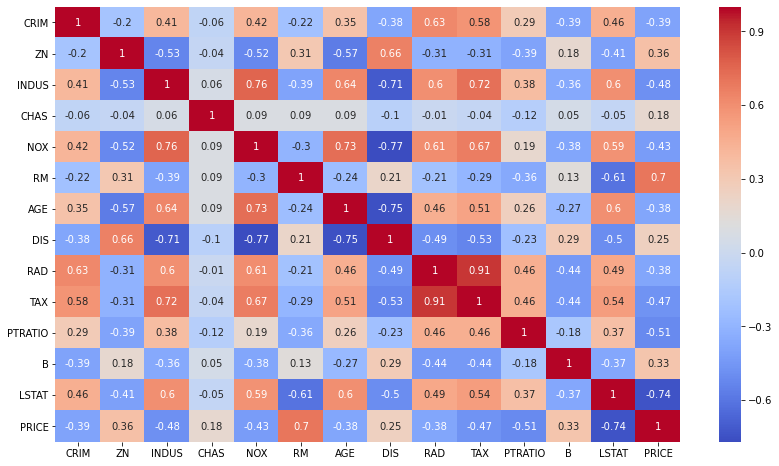

In [44]:
# Plot the correlation heatmap
plt.figure(figsize=(14, 8))
corr_matrix = dataset.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

#### (i) Correlation between independent variables:
We would need to look out for features of multi-collinearity (i.e. features that are correlated with each other)as this will affect our relationship with the independent variable.
Observe that RAD and TAX are highly correlated with each other (Correlation score: 0.91) while there are a couple of features which are somewhat correlated with one another with a correlation score of around 0.70 (INDUS and TAX, NOX and INDUS, AGE and DIS, AGE and INDUS).
(ii) Correlation between independent variable and dependent variable:
In order for our regression model to perform well, we ideally need to select those features that are highly correlated with our dependent variable (PRICE).
We observe that both RM and LSTAT are correlated with PRICE with a correlation score of 0.70 and 0.74 respective. This can also be illustrated via the scatter plot .

Text(0, 0.5, 'PRICE')

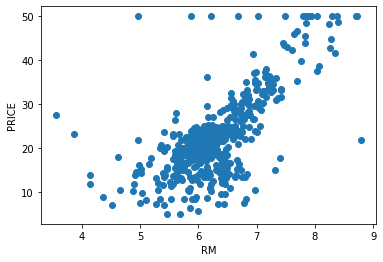

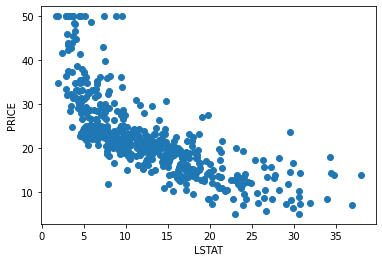

In [45]:
#Scatter plot to observe the correlations between the features that are highly correlated with MEDV
target_var = dataset['PRICE']
plot1 = plt.figure(1)
plt.scatter(dataset['RM'],target_var)
plt.xlabel('RM')
plt.ylabel('PRICE')
plot2 = plt.figure(2)
plt.scatter(dataset['LSTAT'],target_var)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')

#### From the scatter plot above:
i) PRICE increases linearly with the RM. This makes sense as we would expect the median price of a house would be more generally more expensive as the number of rooms increases.
ii) PRICE decreases linearly with LSTAT. This also makes sense since we can expect the median price of a house would generally be less expensive at places of lower status.


#### to determine the distribution of the dependent variable 

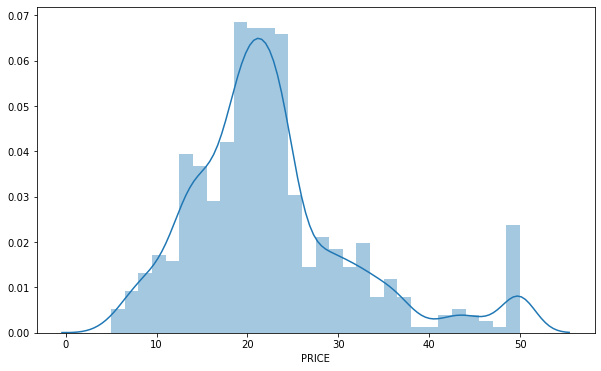

In [46]:
#Plot the distribution of PRICE
plt.figure(figsize=(10, 6))
sns.distplot(dataset['PRICE'],bins=30)

#### The values of PRICE follows a normal distribution with a mean of around 22. There are some outliers to the right

### First create a base model first without any feature engineering and hyperparameter tuning.
#### We would use this model’s performance as a benchmark for comparison later on after we have done feature engineering and hyperparameter tuning later.

#### Regression Model :
Random Forests models require minimal data preparation. It is able to easily hand categorical, numerical and binary features without scaling or normalization required.
Random Forests models can help us in performing implicit feature selections as they provide good indicators of the important features.
Random Forest models are immune to outliers, which is present in our data, and they completely ignore statistical issues because unlike other machine learning models which perform much better after being normalized.

In [47]:
x = dataset.drop('PRICE', axis = 1)
y = dataset['PRICE']

In [48]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

In [50]:
from sklearn.metrics import mean_squared_error
regressor.fit(X_train, y_train)
y_train_pred=regressor.predict(X_train)
y_pred = regressor.predict(X_test)


In [51]:

print('rf train mse: {}'.format(mean_squared_error(y_train, y_train_pred)))
print('rf test mse: {}'.format(mean_squared_error(y_test, y_pred)))

rf train mse: 1.484446923482848
rf test mse: 15.741574992125983


In [52]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.558929133858267
Mean Squared Error: 15.741574992125983
Root Mean Squared Error: 3.967565373390334


In [53]:
from sklearn import metrics
r_score=metrics.r2_score(y_test,y_pred)
r_score

0.8073223415517651

In [56]:
adjusted_r_squared = 1 - (1-r_score)*(len(y)-1)/(len(y)-x.shape[1]-1)
print (adjusted_r_squared)

0.8022312652106531


### To optimize and search for the best hyperparameters, we will be using the Randomized Grid Search method!

In [57]:
n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(X_train, y_train)
m_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 470,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'bootstrap': False}

#### From our Randomized Grid Search, we found that the most optimized hyperparameters for our Random Forest Model to be those above.

In [58]:
y_train_pred=m_random.predict(X_train)
y_pred = m_random.predict(X_test)

In [59]:

print('rf train mse: {}'.format(mean_squared_error(y_train, y_train_pred)))
print('rf test mse: {}'.format(mean_squared_error(y_test, y_pred)))

rf train mse: 3.943211448502441e-06
rf test mse: 22.734413911236384


In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.6338766962640268
Mean Squared Error: 22.734413911236384
Root Mean Squared Error: 4.768061861095804


In [61]:
from sklearn import metrics
r_score=metrics.r2_score(y_test,y_pred)
r_score


0.7217296464425504

In [62]:
adjusted_r_squared = 1 - (1-r_score)*(len(y)-1)/(len(y)-x.shape[1]-1)
print (adjusted_r_squared)

0.7143769744989593
